#ML (Fisher’s Linear Discriminant Classification)



Team members:
- AbdelRaouf Khorshed #5000267

We are required to design a Fisher’s Linear Discriminant classification algorithm that can recognize
scanned images of the 10 digits (0 to 9). This classifier works by trying to find the best decision boundry given that it would maximize separation between classes means while minimizing the within-class variance.

> **Important Project Notes:**
- For Fischer’s, you will assign an image to a digit based on the **minimum** product (not maximum as in least squares classifier).
- We will examine Fisher’s Linear Discriminant twice. Once without including a bias term in each discriminant function and another using a bias term for each discriminant function.
- If the inverse of Sw^-1 results in a singular matrix, use the pseudoinverse function.
- Our target values should be 0 and 1.
- For each time, we will produce a confusion matrix as well as an accuracy degree for our classifier. 


###Importing Libraries 📚

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import patoolib
from PIL import Image #Importing/exporting images
patoolib.extract_archive('/content/Data.zip')

patool: Extracting /content/Data.zip ...
patool: running /usr/bin/7z x -o./Unpack_l4ya5bqh -- /content/Data.zip
patool: ... /content/Data.zip extracted to `Data1' (local file exists).


'Data1'

###Project Code <>💻

Concept understanding:
- Basically in FLDA we want to calculate within-class and between class scatter matrices (Sw, Sb). 
- First we calculate the mean for each class, which has N observations.
- Then we'll calculate the within-class and between-class scatter matrix.
- Calculate Weight matrices and Bias for all classes 
- We formulate Y from the calculates parameters for every image we want to classify, every Y is a 1D array having length = number of possible classes. The prediction is simply the argmin of Y (index of smallest Y)

In [ ]:
width, height = Image.open('/content/Data/Train/1.jpg').size
print("Pixel size of each image:", width*height)

Pixel size of each image: 784


Now that we've derived that the **number of features we have is 784**. We’re going to flatten the image to be just one big array, so the dimension of each image is going to be (1, 784) and in total all the flattened images with result in an array of (2400, 784) since we have 2400 images. 

In [ ]:
training_path = "/content/Data/Train/" 
training_images = np.zeros([2400, 784])
for i in range(1, 2400): #Loop through all the images
  new_path = training_path + str(i) + ".jpg"
  image = Image.open(new_path) #Open the corresponding image
  flattened_image = np.asarray(image).flatten(order='C') #take the image array and flatten in row-major (2D --> 1D) and add the flattened image and the extra 1
  training_images[i-1] =  flattened_image

We're going to create a `classes` function to split the respective classes  into arrays.  

In [ ]:
def classes (training_images):
  # We split each image into its class
	target_classes  = [training_images[i : i+240] for i in range(0, 2400, 240)]
	return target_classes

We're going to create a `class_mean` function to retrieve the mean of the targeted class we want meaning we retrieve *m1* and *m2*.



In [ ]:
def class_mean(list):
    mean = np.round((np.sum(list, axis = 0, keepdims = True))/(len(list)),decimals=8)
    return mean

We have a total of 2,400 images in our training set, therefore there are 240 images per class. Four our testing set we have a total of 200 images, therefore 20 images per class. 

Initialization

In [ ]:
W0_All = []
W1_All = []
S1 = np.zeros((784,784))
S2 = np.zeros((784,784))

data = classes(training_images)

- SW, the within-class **covariance** matrix equation is as below xn are the data points, m1 is the **mean** of class 1 and m2 is the **mean** of class 2 (all other classes combined) 
> 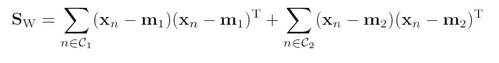

- The weights vector, w, which is orthogonal to the decision boundy and w0 (the bias) are equal to:
> 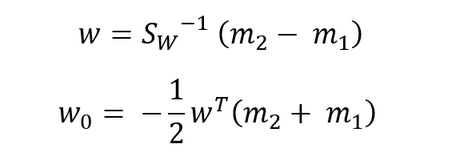

Function:
- C1 is the currently targetted class
- C2 are all the other classes that are not C1
- M1 & M2 are C1's & C2's mean respectively.


In [ ]:
for i in range(10):

    C1 = data[i]   
    M1 = class_mean(C1)

    C2 = [value for index,value in enumerate(data) if index!= i]
    C2 = np.array(C2).reshape(2160,784)
    M2 = class_mean(C2)

    S1 = S1 + np.dot((np.subtract(C1, M1)).T.reshape(784,240),
                     np.subtract(C1, M1).reshape(240,784))
    
    S2 = S2 + np.dot((np.subtract(C2, M2)).T.reshape(784,2160),
                     np.subtract(C2,M2).reshape(2160,784))

    # Now that we've retrieved the necessary parameters we can perform the following calculations
    Sw = S1 + S2
    Sw_inv = np.linalg.pinv(Sw)

    W1 = np.dot(Sw_inv,(np.subtract(M2,M1).T))
    W1_All.append(W1)

    W0 = -0.5 * np.dot(sum(M1, M2),np.array(W1))
    W0_All.append(W0)

Now that we're done with the training phase, we're going to perform the testing.

In [ ]:
testing_path = "/content/Data/Test/" 
testing_images = np.ones([200, 784])
for i in range(1, 200): #Loop through all the images
  new_path = testing_path + str(i) + ".jpg"
  image = Image.open(new_path) #Open the corresponding image
  flattened_image = np.asarray(image).flatten(order='C') #take the image array and flatten in row-major (2D --> 1D) and add the flattened image and the extra 1
  testing_images[i-1] = (flattened_image)

We would calculate Y for every image we want to classify, every Y is a 1D array having length = number of possible classes. The prediction is simply the np.amin of Y (index of smallest Y) with and without the bias term. Then we calculate their respective accuracy scores. 

In [ ]:
training_label_file_path = 'Test Labels.txt'
predictedLabels = np.zeros([200])
predictedLabels_bias = np.zeros([200])
testing_labels = np.loadtxt(testing_path+training_label_file_path)

for i in range(len(testing_labels)):
    Y_bias = np.zeros([10]) # reset Y after every loop 
    Y = np.zeros([10])
    for j in range(10):
        Y_bias[j] = (np.dot(W1_All[j].T,testing_images[i])) + W0_All[j]
        Y[j] = (np.dot(W1_All[j].T,testing_images[i]))

    min_W_bias = np.where(Y_bias == np.amin(Y_bias))
    predictedLabels_bias[i] = min_W_bias[0][0]
    min_W = np.where(Y == np.amin(Y))
    predictedLabels[i] = min_W[0][0]    

print('Accuracy with Bias =', round((accuracy_score(predictedLabels_bias,testing_labels)*100),0))
print('Accuracy without Bias =', round((accuracy_score(predictedLabels,testing_labels)*100),0))

Accuracy with Bias = 82.0
Accuracy without Bias = 66.0


As we can see the accuracy without bias (**66%**) is much lower than the accuracy with bias(**82%**).

These are the actual test labels, we're going to compare them to the predicted ones we got for bias and without bias.

In [ ]:
originalLabels = np.genfromtxt("/content/Data/Test/Test Labels.txt", delimiter = ",")
originalLabels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.])

###Confusion Matrices 

In [ ]:
def confusionMatrix(original, result):
    matrix = np.zeros([10, 10])
    for i in range(len(original)): #Loop through the whole set
        matrix[int(original[i])][int(result[i])] += 1 #Add 1 everytime both actual and predicted results match
        
    return matrix.astype(int) 

In [ ]:
confusion_matrix_bias = confusionMatrix(originalLabels, predictedLabels_bias)
confusion_matrix_bias

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  3, 11,  2,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 18,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  2,  0, 15,  1,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 16,  0,  3],
       [ 0,  0,  1,  0,  0,  3,  0,  0, 15,  1],
       [ 2,  0,  0,  0,  1,  2,  0,  3,  0, 12]])

In [ ]:
confusion_matrix = confusionMatrix(originalLabels, predictedLabels)
confusion_matrix

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  2,  9,  1,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  1, 18,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  4, 13,  1,  0,  0,  0,  0],
       [ 7,  0,  0,  5,  0,  7,  1,  0,  0,  0],
       [ 2,  0,  1,  0,  0,  0, 17,  0,  0,  0],
       [ 5,  2,  2,  1,  0,  0,  0, 10,  0,  0],
       [ 1,  0,  4,  4,  0,  1,  0,  0, 10,  0],
       [ 4,  0,  3,  3,  2,  0,  0,  1,  0,  7]])

With Bias: 


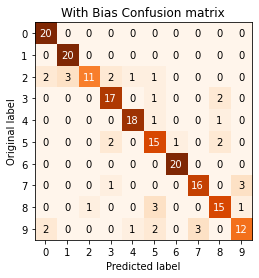

In [ ]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix_bias, interpolation='nearest', cmap=plt.cm.Oranges)
ax.set(xticks=np.arange(confusion_matrix_bias.shape[1]),
        yticks=np.arange(confusion_matrix_bias.shape[0]),
        xticklabels=class_names, yticklabels=class_names, title='With Bias Confusion matrix', ylabel='Original label', xlabel='Predicted label')

thresh = confusion_matrix_bias.max() / 2
for i in range(confusion_matrix_bias.shape[0]):
    for j in range(confusion_matrix_bias.shape[1]):
        ax.text(j, i, format(confusion_matrix_bias[i, j], 'd'), ha="center", va="center",
                 color="white" if confusion_matrix_bias[i, j] > thresh else "black")

print("With Bias: ")
plt.show()

Without Bias: 


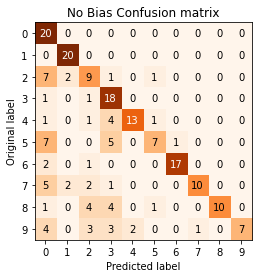

In [ ]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Oranges)
ax.set(xticks=np.arange(confusion_matrix.shape[1]),
        yticks=np.arange(confusion_matrix.shape[0]),
        xticklabels=class_names, yticklabels=class_names, title='No Bias Confusion matrix', ylabel='Original label', xlabel='Predicted label')

thresh = confusion_matrix.max() / 2
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, format(confusion_matrix[i, j], 'd'), ha="center", va="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

print("Without Bias: ")
plt.show()